Say there is a square of side length 2 and a circle inside the square of radius 1.

Simulate the probability that a dart thrown in the square will land in the circle. 

This is a Monte-Carlo technique for estimating the value of $\pi$.

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
num_darts_in_square = 10000 #number of darts thrown
num_darts_in_circle = 0 #number of darts that land in the circle

xy_values = np.empty(shape=(num_darts_in_square,2))
inside_circle = np.zeros(shape=num_darts_in_square, dtype=bool)
for i in range(num_darts_in_square):
    #divide the circle into quadrants
    x = 2*np.random.rand() - 1 # between -1 and 1
    y = 2*np.random.rand() -1 # between -1 and 1

    xy_values[i,0] = x
    xy_values[i,1] = y
    
    if x**2 + y**2 <= 1:
        num_darts_in_circle = num_darts_in_circle + 1
        inside_circle[i] = True

estimate = num_darts_in_circle/num_darts_in_square
actual = np.pi/4

print('estimate: ', estimate )
print('actual: ', actual)

estimate:  0.7881
actual:  0.7853981633974483


In [3]:
which_darts_in_circle = np.nonzero(inside_circle)[0]
which_darts_outside_circle = np.nonzero(~inside_circle)[0]
which_darts_in_circle.shape, which_darts_outside_circle.shape

((7881,), (2119,))

In [4]:
darts_in_circle = xy_values[which_darts_in_circle,:]
darts_outside_circle = xy_values[which_darts_outside_circle,:]

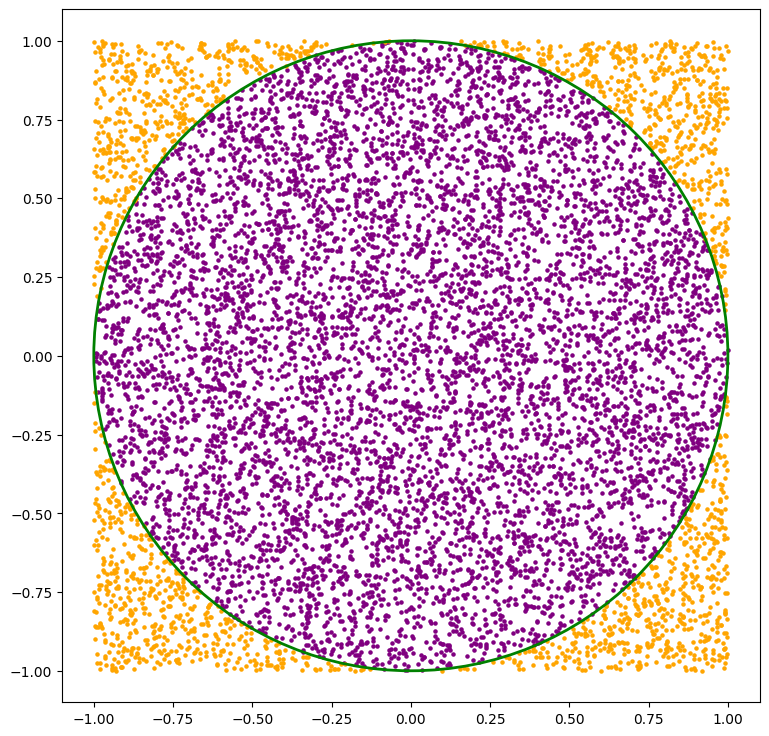

In [16]:
fig,ax = plt.subplots(figsize=(9,9))

ax.scatter(darts_in_circle[:,0], darts_in_circle[:,1], s=5, color='purple')
ax.scatter(darts_outside_circle[:,0], darts_outside_circle[:,1], s=5, color='orange')

circle1 = plt.Circle((0, 0), 1, color='g', fill=False, lw=2)
ax.add_patch(circle1)

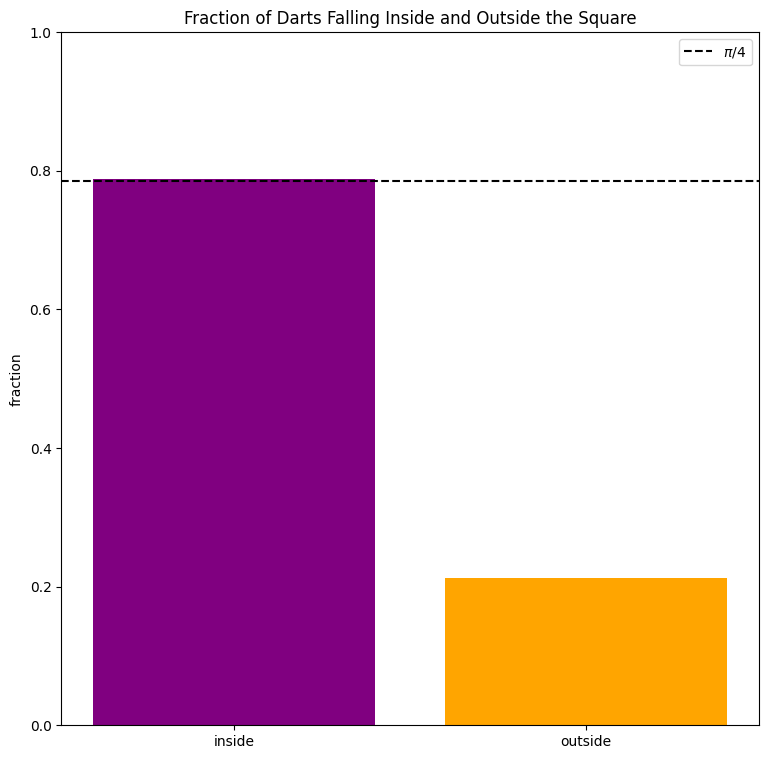

In [7]:
fig,ax = plt.subplots(figsize=(9,9))

ax.bar(x=['inside','outside'],
       height=[darts_in_circle.shape[0]/num_darts_in_square,darts_outside_circle.shape[0]/num_darts_in_square],
       color=['purple','orange'])

ax.set_ylim(0,1)
ax.set_title('Fraction of Darts Falling Inside and Outside the Square')
ax.set_ylabel('fraction')

ax.axhline(y=np.pi/4, linestyle='dashed', color='black', label='$\pi / 4$')
ax.legend()